# KDAG TASK ROUND : TASK 2

There were two main algorithms to implement - **KMeans Clustering** and **Elbow Method**

### KMEANS ALGORITHM
K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. In this topic, we will learn what is K-means clustering algorithm, how the algorithm works, along with the Python implementation of k-means clustering.<br><br>
A Kmeans Class is built which contains all methods required to:
- find points in an image (using *numpy*)
- run the algorithm and find clusters and centroids 
- display the found clusters and their centroids 

In [2]:
#importing important libraries
import matplotlib.pyplot as plt       
import numpy as np                    
import random                           
from tabulate import tabulate

class KMeans:
    #constructor to initialize all object members and reading image
    def __init__(self,image,n_clusters=3,max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.image = plt.imread(image)
        self.image_points = None
    
    # extracting places where light was seen
    def find_points(self,image):
        points=[]
        for i in range(len(image)):
            for j in range(len(image[i])):
                k=image[i][j]
                if k[0]!=0 and k[1]!=0 and k[2]!=0:
                    points.append([j,i])
        self.image_points = points
        return points
        
    # main function to find out the clusters and their centroids
    def fit_predict(self):
        X=np.array(self.find_points(self.image))
        # randomly selecting three points as cluster centroids
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
        for i in range(self.max_iter):
            # assign clusters to each centroid
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids based on mean value of points in cluster
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish condition
            if (old_centroids == self.centroids).all():
                break
        return cluster_group,self.centroids
    
    def assign_clusters(self,X):
        cluster_group = []
        distances = []
        # assigns cluster points a centroid based on proximity to the centroids
        for row in X:
            for centroid in self.centroids:
                distances.append(np.linalg.norm(row-centroid))
            min_distance = min(distances)
            index = distances.index(min_distance)
            cluster_group.append(index)
            distances.clear()
        #cluster_group says which cluster each point falls under
        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []
        # determining how to clusters are in image using np.unique
        cluster_type = np.unique(cluster_group)
        # averaging point coordinates of each cluster
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        # retunring new centroids
        return np.array(new_centroids)
    
    def run(self):
        points = np.array(self.find_points(self.image))
        clust,centroids=self.fit_predict()
        #creating a scatter plot of image size
        plt.xlim(0,len(self.image[0])) 
        plt.ylim(0,len(self.image))
        #plotting each point which belongs clusters 0,1,2,3 respectively
        plt.scatter(points[clust == 0,0],points[clust == 0,1],color='red')
        plt.scatter(points[clust == 1,0],points[clust == 1,1],color='blue')
        plt.scatter(points[clust == 2,0],points[clust == 2,1],color='green')
        plt.scatter(points[clust == 3,0],points[clust == 3,1],color='yellow')
        plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='black')
        plt.gca().invert_yaxis()     #to match the image format
        plt.show()
        return(centroids)

#### RUNNING THE ALGORITHM
You have to create an **object** of the KMeans **class** which is here named as `kobj`<br>
It gives as output a graph where all points are plotted as dots and with each cluster having a distinct color. Each cluster has a centroid marked by a 'x'<br><br>
Here you can vary the input parameters to achieve your desired result in the line `kobj=KMeans('1.png',n_clusters=3,max_iter=500)`<br><br>
In case desired output is not generated:<br>
- Make sure your image path is correctly entered while object creation<br>
- Increasing the `max_iter` gives better output<br>
- Make sure you are entering the optimal cluster number (by the elbow method discussed later)<br>
- Just run the code block below once again and it should be fine if the error was caused by the randomness of the code


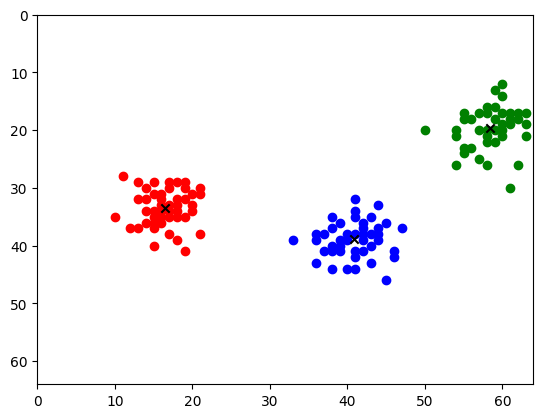

In [3]:
#running the KMeans algorithm
kobj=KMeans('1.png',n_clusters=3,max_iter=500)
centroids=kobj.run()

#### DISPLAYING THE DISTANCES BETWEEN CENTROIDS
Here using a nested loop and string manipulation we create a 2D list containing the distances between all the centroids or _cities_
<br>Later `tabulate` was used to give it a nice look as a table

In [9]:
# displaying the table of distances between clusters
def dist_table(c_list):
    disp=[["Clusters","Distances"]]
    for i in range(len(c_list)):
        for j in range(len(c_list)):
            if (i<j):
                betn="Cluster "+str(i+1)+" and Cluster "+str(j+1)
                dist=np.linalg.norm(c_list[i]-c_list[j])
                disp.append([betn,dist])
    print(tabulate(disp))      #using tabulate to print the 2D-list in table format
dist_table(centroids)       

-----------------------  ------------------
Clusters                 Distances
Cluster 1 and Cluster 2  24.969670633907217
Cluster 1 and Cluster 3  44.158775128406916
Cluster 2 and Cluster 3  26.075866303439494
-----------------------  ------------------


### ELBOW METHOD ALGORITHM
In this algorithm a parameter is used which is **WCSS (Within Cluster Sum of Squared distances)** <br>
This parameter is the sum of the squared distances of the centroids from each of the points under the cluster of that centroid.<br>
This method gives as output a graph with a visible **elbow**(a visibly sharp turn) or a **steep change in slope** in y-axis.<br>
The abscissa of this steep change in slope denotes the number of clusters present in the image.

<i>**Things to keep in mind while running the code below:** </i>
- Make sure you give the correct image path in the first line of the following code block
- If dimension mismatch numpy error occurs run the code once again and the output should be fine
- If no visible elbow is found run the code block once again and it should give the correct output



k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


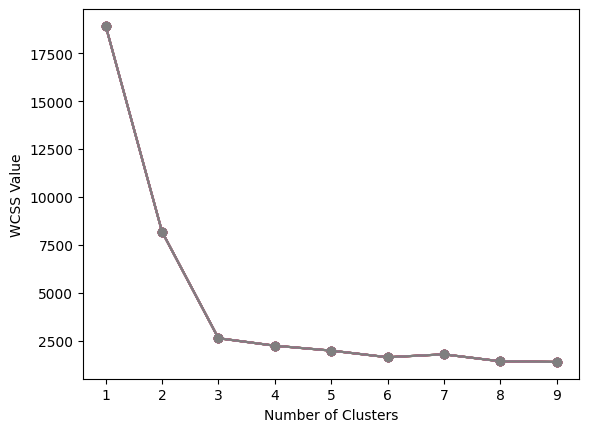

In [5]:
image = '2.png'
kobj=KMeans(image)
points=kobj.find_points(kobj.image)
points=np.array(points)
# implementing elbow method for possible cluster number of 1 to 9
wcss_arr=[]
for k in range(1,10):
    print("k: ",k)
    kobj=KMeans(image,k,max_iter=5000)
    clust,centroids=kobj.fit_predict()
    wcss = 0
    for i in range(centroids.shape[0]):
        #wcss calculation
        wcss += np.linalg.norm(points[clust == i] - centroids[i]) ** 2    
    wcss_arr.append(wcss)
wcss_arr=np.array(wcss_arr)
for i in range(len(wcss_arr)-1):
    plt.plot(np.arange(1,10),wcss_arr, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Value")
plt.show()

## FINAL OUTPUT OF THE CODE 
Now, that you finally know the optimal number of numbers in `image` it is time to run the KMeans algorithm based on that number.<br>
This block asks for your optimal number of clusters. Enter the Cluster Number obtained from ELbow Method Graph and it outputs both the **Clustered Image** and the **Distances** between the Centroids/Cities.


In [ ]:
optimal_clusters = int(input("Enter you optimal number of clusters: "))
kobj=KMeans(image,optimal_clusters,max_iter=5000)
centroids=kobj.run()
dist_table(centroids)